In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.pandas.set_option('display.max_columns', None)

In [6]:
test_df = pd.read_csv('./Raw Data/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
test_df.shape

In [7]:
null_features = [features for features in test_df.columns if test_df[features].isnull().sum() > 0]

for features in test_df[null_features]:
    print(features, ':' , np.round(test_df[features].isnull().sum()/test_df.shape[0]*100, 4))
    #print(features, ':' , df[features].isnull().mean()*100)

MSZoning : 0.2742
LotFrontage : 15.5586
Alley : 92.6662
Utilities : 0.1371
Exterior1st : 0.0685
Exterior2nd : 0.0685
MasVnrType : 1.0966
MasVnrArea : 1.0281
BsmtQual : 3.0158
BsmtCond : 3.0843
BsmtExposure : 3.0158
BsmtFinType1 : 2.8787
BsmtFinSF1 : 0.0685
BsmtFinType2 : 2.8787
BsmtFinSF2 : 0.0685
BsmtUnfSF : 0.0685
TotalBsmtSF : 0.0685
BsmtFullBath : 0.1371
BsmtHalfBath : 0.1371
KitchenQual : 0.0685
Functional : 0.1371
FireplaceQu : 50.0343
GarageType : 5.209
GarageYrBlt : 5.3461
GarageFinish : 5.3461
GarageCars : 0.0685
GarageArea : 0.0685
GarageQual : 5.3461
GarageCond : 5.3461
PoolQC : 99.7944
Fence : 80.1234
MiscFeature : 96.5045
SaleType : 0.0685


In [8]:
test_df = test_df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)

In [9]:
temporal_features = [feature for feature in test_df.columns if 'Year' in feature or 'Yr' in feature]

In [10]:
test_df[temporal_features]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,1961,1961,1961.0,2010
1,1958,1958,1958.0,2010
2,1997,1998,1997.0,2010
3,1998,1998,1998.0,2010
4,1992,1992,1992.0,2010
...,...,...,...,...
1454,1970,1970,NaN,2006
1455,1970,1970,1970.0,2006
1456,1960,1996,1960.0,2006
1457,1992,1992,NaN,2006


# Feature Engineering

# Missing values

Missing value imputation for categorical features

In [11]:
df_FE = test_df.copy()

In [12]:
cat_features_na = [feature for feature in df_FE.columns if df_FE[feature].dtypes == 'O' and df_FE[feature].isnull().sum()>0]

for feature in cat_features_na:
    print('Null value percentage in {} is: {}%\n'.format(feature, np.round(df_FE[feature].isnull().mean()*100, 4)))
print('Total features with null values are: {}'.format(len(cat_features_na)))    

Null value percentage in MSZoning is: 0.2742%

Null value percentage in Utilities is: 0.1371%

Null value percentage in Exterior1st is: 0.0685%

Null value percentage in Exterior2nd is: 0.0685%

Null value percentage in MasVnrType is: 1.0966%

Null value percentage in BsmtQual is: 3.0158%

Null value percentage in BsmtCond is: 3.0843%

Null value percentage in BsmtExposure is: 3.0158%

Null value percentage in BsmtFinType1 is: 2.8787%

Null value percentage in BsmtFinType2 is: 2.8787%

Null value percentage in KitchenQual is: 0.0685%

Null value percentage in Functional is: 0.1371%

Null value percentage in FireplaceQu is: 50.0343%

Null value percentage in GarageType is: 5.209%

Null value percentage in GarageFinish is: 5.3461%

Null value percentage in GarageQual is: 5.3461%

Null value percentage in GarageCond is: 5.3461%

Null value percentage in SaleType is: 0.0685%

Total features with null values are: 18


In [13]:
df_FE[df_FE['FireplaceQu'].isna()].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,500,3,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,804.0,Rec,78.0,0.0,882.0,GasA,TA,Y,SBrkr,882,0,0,882,1.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,Attchd,1970.0,Fin,2.0,525.0,TA,TA,Y,240,0,0,0,0,0,0,4,2010,WD,Normal


FireplaceQu feature has 47% NA values, but as per the data discription -

NA mean No Fireplace

Fireplaces: Number of fireplaces

Lets figure it out

In [14]:
df_FE['Fireplaces'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [15]:
df_FE[['Fireplaces', 'FireplaceQu']][df_FE['Fireplaces']==0].head()

,Fireplaces,FireplaceQu
0,0,NaN
1,0,NaN
4,0,NaN
6,0,NaN
9,0,NaN


We can clearly see that 'Fireplaces', 'FireplaceQu' both are corelated to each other, if Fireplaces has 0 then FireplaceQu would be taken as NaN. So we will compute this null value with No Fireplace

In [16]:
df_FE['FireplaceQu'].fillna('No Fireplace', inplace = True)

In [17]:
feature_mode = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'SaleType']

In [18]:
for i in feature_mode:
    print("Missing values in '{}' is: {}".format(i, df_FE[i].isna().sum()))

Missing values in 'MSZoning' is: 4
Missing values in 'Utilities' is: 2
Missing values in 'Exterior1st' is: 1
Missing values in 'Exterior2nd' is: 1
Missing values in 'KitchenQual' is: 1
Missing values in 'Functional' is: 2
Missing values in 'SaleType' is: 1


In [19]:
for i in feature_mode:
    print("Value counts in '{}' is given below:\n{}".format(i, df_FE[i].value_counts().head()), '\n')

Value counts in 'MSZoning' is given below:
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64 

Value counts in 'Utilities' is given below:
AllPub    1457
Name: Utilities, dtype: int64 

Value counts in 'Exterior1st' is given below:
VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
Name: Exterior1st, dtype: int64 

Value counts in 'Exterior2nd' is given below:
VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
Name: Exterior2nd, dtype: int64 

Value counts in 'KitchenQual' is given below:
TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64 

Value counts in 'Functional' is given below:
Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Name: Functional, dtype: int64 

Value counts in 'SaleType' is given below:
WD       1258
New       117
COD        44
ConLD      17
CWD         8
Name: SaleType, dtype: int64 



As these feature are having very less null values, So We can fill missing values with their modes.

In [20]:
for feature in feature_mode:
    df_FE[feature] = df_FE[feature].fillna(df_FE[feature].mode()[0])

In [21]:
df_FE[df_FE['MasVnrType'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
231,1692,60,RL,NaN,12891,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,651.0,Unf,0.0,219.0,870.0,GasA,Ex,Y,SBrkr,878,1126,0,2004,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2002.0,Fin,3.0,644.0,TA,TA,Y,0,48,0,0,0,0,0,7,2009,WD,Normal
246,1707,20,FV,90.0,7993,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,No Fireplace,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,0,10,2009,New,Partial
422,1883,60,RL,70.0,8749,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,840.0,840.0,GasA,Ex,Y,SBrkr,840,885,0,1725,0.0,0.0,2,1,3,1,Gd,6,Typ,0,No Fireplace,Attchd,2002.0,RFn,2.0,550.0,TA,TA,Y,0,48,0,0,0,0,0,11,2009,WD,Normal
532,1993,60,RL,NaN,7750,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,707.0,707.0,GasA,Ex,Y,SBrkr,707,707,0,1414,0.0,0.0,2,1,3,1,Gd,6,Typ,1,Gd,Attchd,2002.0,Fin,2.0,403.0,TA,TA,Y,100,35,0,0,0,0,0,4,2008,WD,Normal
544,2005,20,RL,87.0,10037,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,Ex,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,Fin,2.0,480.0,TA,TA,Y,0,20,0,0,0,0,0,8,2008,WD,Normal
581,2042,60,FV,NaN,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Ex,Y,SBrkr,952,860,0,1812,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,469.0,TA,TA,Y,144,112,0,0,0,0,0,4,2008,WD,Normal
851,2312,60,RL,59.0,15810,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,768.0,768.0,GasA,Ex,Y,SBrkr,768,728,0,1496,0.0,0.0,3,0,3,1,Gd,7,Typ,0,No Fireplace,Attchd,2007.0,Unf,2.0,572.0,TA,TA,Y,100,0,0,0,0,0,0,5,2007,New,Partial
865,2326,80,RL,NaN,11950,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Ex,Y,SBrkr,754,640,0,1394,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,BuiltIn,2003.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,10,2007,WD,Normal
880,2341,20,RL,85.0,9965,Pave,Reg,Lvl,AllPub,FR2,Gtl,Somerst,Feedr,Norm,1Fam,1Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1528.0,1528.0,GasA,Ex,Y,SBrkr,1528,0,0,1528,0.0,0.0,3,2,3,1,Gd,6,Typ,1,TA,Attchd,2007.0,Unf,2.0,480.0,TA,TA,Y,0,228,0,0,0,0,0,9,2007,New,Partial
889,2350,60,FV,112.0,12217,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Hip,CompShg,WdShing,Wd Shng,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,GLQ,745.0,Unf,0.0,210.0,955.0,GasA,Ex,Y,SBrkr,955,925,0,1880,1.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2007.0,Fin,3.0,880.0,TA,TA,Y,16

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace   Brick Face
       CBlock	Cinder Block
       None	  None
       Stone	 Stone
       
Most of the house does not have Masonry veneer type, so we will be replaceing null with None

In [22]:
df_FE['MasVnrType'].fillna('None', inplace = True)

# Exploring 'bsmt' related feature

In [23]:
bsmt = [feature for feature in df_FE.columns if 'Bsmt' in feature]

In [24]:
df_FE[bsmt][df_FE['BsmtQual'].isna()].head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
125,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
133,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
269,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
318,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
354,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
   
if 'BsmtQual' has any NaN value, it means that perticula house does not have any basement, so that is why all the basemet related feature has NaN or 0 value

We will replace NaN with 'No Basement' in all bsmt related categorical features

In [25]:
bsmt_cat = [feature for feature in bsmt if df_FE[feature].dtypes == 'O']

In [26]:
#for feature in bsmt_cat:
    #df[feature] = df[feature].fillna('No Basement')

def fill_na(data, feature, value):
    dataset = data.copy()
    dataset[feature] = dataset[feature].fillna(value)
    return dataset

df_new = fill_na(df_FE, bsmt_cat, 'No Basement')

In [27]:
cat_features_na = [feature for feature in df_new.columns if df_new[feature].dtypes == 'O' and df_new[feature].isnull().sum()>0]

for feature in cat_features_na:
    print('Null value percentage in {} is: {}%\n'.format(feature, np.round(df_new[feature].isnull().mean()*100, 4)))
print('Remaining features with null values are: {}'.format(len(cat_features_na)))    

Null value percentage in GarageType is: 5.209%

Null value percentage in GarageFinish is: 5.3461%

Null value percentage in GarageQual is: 5.3461%

Null value percentage in GarageCond is: 5.3461%

Remaining features with null values are: 4


# Exploring 'Garage' related feature

In [28]:
df_new[df_new['GarageType'].isna()].head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
53,1514,90,RL,98.0,13260,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,144.0,TA,TA,CBlock,TA,TA,No,BLQ,1500.0,Unf,0.0,228.0,1728.0,GasA,TA,Y,SBrkr,1728,0,0,1728,2.0,0.0,2,0,6,2,TA,10,Typ,0,No Fireplace,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,0,1,2010,Oth,Abnorml
71,1532,30,RM,56.0,4485,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,7,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,BLQ,579.0,Unf,0.0,357.0,936.0,GasA,TA,Y,SBrkr,936,0,0,936,1.0,0.0,1,0,2,1,TA,5,Typ,1,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,P,51,0,135,0,0,0,0,5,2010,WD,Normal
79,1540,190,RM,100.0,9045,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,5,3,1910,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Fa,BrkTil,TA,TA,Mn,Unf,0.0,Unf,0.0,840.0,840.0,Grav,Fa,N,FuseF,1128,1128,0,2256,0.0,0.0,2,0,4,2,Fa,12,Typ,0,No Fireplace,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,18,18,0,0,0,0,6,2010,WD,Abnorml
92,1553,70,RM,60.0,12900,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,6,8,1912,2009,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,TA,No,Unf,0.0,Unf,0.0,780.0,780.0,GasA,Ex,Y,SBrkr,780,780,0,1560,0.0,0.0,1,1,3,1,Gd,7,Typ,0,No Fireplace,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,344,0,0,0,168,0,0,5,2010,WD,Normal
96,1557,190,RL,60.0,9900,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,2fmCon,1.5Fin,5,4,1915,1950,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,Fa,Fa,BrkTil,TA,TA,No,Rec,1026.0,Unf,0.0,186.0,1212.0,GasA,TA,N,SBrkr,1212,180,0,1392,1.0,0.0,1,0,3,1,TA,6,Typ,0,No Fireplace,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,168,0,0,0,0,2,2010,ConLD,Normal


Those house which does not have any Garage, have NaN and 0 in Garage retaed feature, so we will fill those null values with No Garage

In [29]:
garage_cat = [feature for feature in df_new.columns if 'Garage' in feature and df_new[feature].dtypes == 'O']
garage_cat

['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

In [30]:
df_cat = fill_na(df_new, garage_cat, 'No Garage')

In [31]:
cat_features = [feature for feature in df_cat.columns if df_cat[feature].dtypes == 'O']

In [32]:
df_cat[cat_features].isna().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

# Numerical Features

In [33]:
num_features = [feature for feature in df_cat.columns if df_cat[feature].dtypes != 'O']
num_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [34]:
num_features_na = [feature for feature in df_cat.columns if df_cat[feature].dtypes != 'O' and df_cat[feature].isnull().sum() > 0]

for feature in num_features_na:
    print('Null value percentage in {} is {}'.format(feature, np.round(df_cat[feature].isnull().mean()*100 ,4)))

Null value percentage in LotFrontage is 15.5586
Null value percentage in MasVnrArea is 1.0281
Null value percentage in BsmtFinSF1 is 0.0685
Null value percentage in BsmtFinSF2 is 0.0685
Null value percentage in BsmtUnfSF is 0.0685
Null value percentage in TotalBsmtSF is 0.0685
Null value percentage in BsmtFullBath is 0.1371
Null value percentage in BsmtHalfBath is 0.1371
Null value percentage in GarageYrBlt is 5.3461
Null value percentage in GarageCars is 0.0685
Null value percentage in GarageArea is 0.0685


Missing value imputation for numerical features

In [35]:
df_cat[df_cat['LotFrontage'].isna()].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
6,1467,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,No Fireplace,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,500,3,2010,WD,Normal
40,1501,160,FV,NaN,2980,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,2000,2000,Gable,CompShg,MetalSd,MetalSd,BrkFace,1159.0,Gd,TA,PConc,Gd,TA,No,GLQ,466.0,Unf,0.0,290.0,756.0,GasA,Ex,Y,SBrkr,756,756,0,1512,1.0,0.0,2,1,2,1,Gd,5,Typ,0,No Fireplace,Detchd,2000.0,Unf,2.0,440.0,TA,TA,Y,0,32,0,0,0,0,0,5,2010,WD,Normal
41,1502,160,FV,NaN,2403,Pave,IR1,Lvl,AllPub,FR2,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,244.0,Unf,0.0,286.0,530.0,GasA,Ex,Y,SBrkr,530,550,0,1080,0.0,0.0,2,1,2,1,Gd,4,Typ,0,No Fireplace,Attchd,2003.0,RFn,2.0,496.0,TA,TA,Y,0,50,0,0,0,0,0,6,2010,WD,Normal
45,1506,20,RL,NaN,10456,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1967,1967,Hip,CompShg,HdBoard,HdBoard,BrkFace,120.0,TA,TA,CBlock,TA,TA,No,GLQ,506.0,Unf,0.0,1323.0,1829.0,GasA,Gd,Y,SBrkr,1829,0,0,1829,1.0,0.0,2,0,4,1,TA,8,Typ,0,No Fireplace,Attchd,1967.0,RFn,2.0,535.0,TA,TA,Y,0,76,0,0,0,0,0,5,2010,WD,Normal
47,1508,50,RL,NaN,18837,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1.5Fin,6,5,1978,1978,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,Gd,TA,Mn,ALQ,687.0,LwQ,46.0,491.0,1224.0,GasA,TA,Y,SBrkr,1287,604,0,1891,0.0,1.0,3,0,3,1,TA,7,Typ,1,TA,Attchd,1978.0,RFn,2.0,678.0,TA,TA,Y,0,69,0,0,0,0,0,4,2010,WD,Normal


In [36]:
df_cat['LotFrontage'].fillna(df_cat['LotFrontage'].median(), inplace=True)

In [37]:
garage_num = [feature for feature in df_cat.columns if 'Garage' in feature and df_cat[feature].dtypes != 'O' and df_cat[feature].isna().sum()>0]
garage_num

['GarageYrBlt', 'GarageCars', 'GarageArea']

In [38]:
df_cat[df_cat['GarageYrBlt'].isna()].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
53,1514,90,RL,98.0,13260,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,144.0,TA,TA,CBlock,TA,TA,No,BLQ,1500.0,Unf,0.0,228.0,1728.0,GasA,TA,Y,SBrkr,1728,0,0,1728,2.0,0.0,2,0,6,2,TA,10,Typ,0,No Fireplace,No Garage,NaN,No Garage,0.0,0.0,No Garage,No Garage,Y,0,0,0,0,0,0,0,1,2010,Oth,Abnorml
71,1532,30,RM,56.0,4485,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,7,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,BLQ,579.0,Unf,0.0,357.0,936.0,GasA,TA,Y,SBrkr,936,0,0,936,1.0,0.0,1,0,2,1,TA,5,Typ,1,Gd,No Garage,NaN,No Garage,0.0,0.0,No Garage,No Garage,P,51,0,135,0,0,0,0,5,2010,WD,Normal
79,1540,190,RM,100.0,9045,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,5,3,1910,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Fa,BrkTil,TA,TA,Mn,Unf,0.0,Unf,0.0,840.0,840.0,Grav,Fa,N,FuseF,1128,1128,0,2256,0.0,0.0,2,0,4,2,Fa,12,Typ,0,No Fireplace,No Garage,NaN,No Garage,0.0,0.0,No Garage,No Garage,N,0,18,18,0,0,0,0,6,2010,WD,Abnorml
92,1553,70,RM,60.0,12900,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,6,8,1912,2009,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,TA,No,Unf,0.0,Unf,0.0,780.0,780.0,GasA,Ex,Y,SBrkr,780,780,0,1560,0.0,0.0,1,1,3,1,Gd,7,Typ,0,No Fireplace,No Garage,NaN,No Garage,0.0,0.0,No Garage,No Garage,N,344,0,0,0,168,0,0,5,2010,WD,Normal
96,1557,190,RL,60.0,9900,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,2fmCon,1.5Fin,5,4,1915,1950,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,Fa,Fa,BrkTil,TA,TA,No,Rec,1026.0,Unf,0.0,186.0,1212.0,GasA,TA,N,SBrkr,1212,180,0,1392,1.0,0.0,1,0,3,1,TA,6,Typ,0,No Fireplace,No Garage,NaN,No Garage,0.0,0.0,No Garage,No Garage,N,0,0,168,0,0,0,0,2,2010,ConLD,Normal


Used fill_na function to fill missing values in GarageYrBlt feature

In [39]:
df_cat = fill_na(df_cat, garage_num, 0)

In [40]:
bsmt_num_na = [feature for feature in bsmt if df_cat[feature].dtypes != 'O' and  df_cat[feature].isna().sum()>0]
bsmt_num_na

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath']

In [41]:
df_cat[df_cat['BsmtFinSF1'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,No Basement,No Basement,No Basement,No Basement,NaN,No Basement,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,No Fireplace,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,0,4,2008,ConLD,Abnorml


Here we are filling all basemet related missing values with 0 because if any house does not have any basement, then all the basement related numerical featurs will have 0

In [42]:
df_cat = fill_na(df_cat, bsmt_num_na, 0)

In [43]:
num_features_na_re = [feature for feature in df_cat.columns if df_cat[feature].dtypes != 'O' and df_cat[feature].isnull().sum() > 0]

for feature in num_features_na_re:
    print('Null value percentage in {} is {}'.format(feature, np.round(df_cat[feature].isnull().mean()*100 ,4)))

Null value percentage in MasVnrArea is 1.0281


In [44]:
df_cat[df_cat['MasVnrArea'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
231,1692,60,RL,67.0,12891,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,None,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,651.0,Unf,0.0,219.0,870.0,GasA,Ex,Y,SBrkr,878,1126,0,2004,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2002.0,Fin,3.0,644.0,TA,TA,Y,0,48,0,0,0,0,0,7,2009,WD,Normal
246,1707,20,FV,90.0,7993,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,None,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,No Fireplace,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,0,10,2009,New,Partial
422,1883,60,RL,70.0,8749,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,None,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,840.0,840.0,GasA,Ex,Y,SBrkr,840,885,0,1725,0.0,0.0,2,1,3,1,Gd,6,Typ,0,No Fireplace,Attchd,2002.0,RFn,2.0,550.0,TA,TA,Y,0,48,0,0,0,0,0,11,2009,WD,Normal
532,1993,60,RL,67.0,7750,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,None,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,707.0,707.0,GasA,Ex,Y,SBrkr,707,707,0,1414,0.0,0.0,2,1,3,1,Gd,6,Typ,1,Gd,Attchd,2002.0,Fin,2.0,403.0,TA,TA,Y,100,35,0,0,0,0,0,4,2008,WD,Normal
544,2005,20,RL,87.0,10037,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,None,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,Ex,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,Fin,2.0,480.0,TA,TA,Y,0,20,0,0,0,0,0,8,2008,WD,Normal
581,2042,60,FV,67.0,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,None,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Ex,Y,SBrkr,952,860,0,1812,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,469.0,TA,TA,Y,144,112,0,0,0,0,0,4,2008,WD,Normal
851,2312,60,RL,59.0,15810,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,NaN,Gd,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,768.0,768.0,GasA,Ex,Y,SBrkr,768,728,0,1496,0.0,0.0,3,0,3,1,Gd,7,Typ,0,No Fireplace,Attchd,2007.0,Unf,2.0,572.0,TA,TA,Y,100,0,0,0,0,0,0,5,2007,New,Partial
865,2326,80,RL,67.0,11950,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,None,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Ex,Y,SBrkr,754,640,0,1394,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,BuiltIn,2003.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,10,2007,WD,Normal
880,2341,20,RL,85.0,9965,Pave,Reg,Lvl,AllPub,FR2,Gtl,Somerst,Feedr,Norm,1Fam,1Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1528.0,1528.0,GasA,Ex,Y,SBrkr,1528,0,0,1528,0.0,0.0,3,2,3,1,Gd,6,Typ,1,TA,Attchd,2007.0,Unf,2.0,480.0,TA,TA,Y,0,228,0,0,0,0,0,9,2007,New,Partial
889,2350,60,FV,112.0,12217,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Hip,CompShg,WdShing,Wd Shng,None,NaN,Gd,TA,PConc,Ex,TA,Av,GLQ,745.0,Unf,0.0,210.0,955.0,GasA,Ex,Y,SBrkr,955,925,0,1880,1.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2007.0,Fin,3.0,88

'MasVnrArea', 'MasVnrType' both are corealated feature, and here we can say that if any houes have None as Masonry veneer type, then Masonry veneer area should be 0

In [45]:
df_num = fill_na(df_cat, 'MasVnrArea', 0)

In [46]:
for features in num_features_na:
    print(features, ':' , np.round(df_num[features].isnull().sum()/df_num.shape[0]*100, 4))

LotFrontage : 0.0
MasVnrArea : 0.0
BsmtFinSF1 : 0.0
BsmtFinSF2 : 0.0
BsmtUnfSF : 0.0
TotalBsmtSF : 0.0
BsmtFullBath : 0.0
BsmtHalfBath : 0.0
GarageYrBlt : 0.0
GarageCars : 0.0
GarageArea : 0.0


In [47]:
df_num.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

# Handeling temporal features (Time Dome features)

Converting float value to int from GarageYrBlt

In [48]:
df_num['GarageYrBlt'] = df_num['GarageYrBlt'].astype('int64')

In [49]:
df_num['GarageYrBlt'].head()

0    1961
1    1958
2    1997
3    1998
4    1992
Name: GarageYrBlt, dtype: int64

In [50]:
df_num[temporal_features]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,1961,1961,1961,2010
1,1958,1958,1958,2010
2,1997,1998,1997,2010
3,1998,1998,1998,2010
4,1992,1992,1992,2010
...,...,...,...,...
1454,1970,1970,0,2006
1455,1970,1970,1970,2006
1456,1960,1996,1960,2006
1457,1992,1992,0,2006


In [51]:
for feature in temporal_features:
    if 'YrSold' in feature:
        pass
    else:
        df_num[feature] = df_num['YrSold'] - df_num[feature]

In [52]:
df_num[temporal_features]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,49,49,49,2010
1,52,52,52,2010
2,13,12,13,2010
3,12,12,12,2010
4,18,18,18,2010
...,...,...,...,...
1454,36,36,2006,2006
1455,36,36,36,2006
1456,46,10,46,2006
1457,14,14,2006,2006


In [53]:
df_num.loc[df_num['GarageYrBlt'] == df_num['YrSold'], ['GarageYrBlt']] = 0

In [54]:
df_num[temporal_features]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,49,49,49,2010
1,52,52,52,2010
2,13,12,13,2010
3,12,12,12,2010
4,18,18,18,2010
...,...,...,...,...
1454,36,36,0,2006
1455,36,36,36,2006
1456,46,10,46,2006
1457,14,14,0,2006


In [55]:
df_num.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,No Fireplace,Attchd,49,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,No Fireplace,Attchd,52,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,No Fireplace,Attchd,18,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal


# Numerical Varibales
In this step we will remove the skewness of the numerical data

In [56]:
numerical_features = [feature for feature in df_num.columns if df_num[feature].dtype != 'O']
print('Lenght of numerial features is', len(numerical_features))
df_num[numerical_features].head()

Lenght of numerial features is 37


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,49,49,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,49,1.0,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,52,52,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,52,1.0,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,13,12,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,13,2.0,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,12,12,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,12,2.0,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,18,18,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,18,2.0,506.0,0,82,0,0,144,0,0,1,2010


In [57]:
discrete_num_features = [feature for feature in numerical_features if df_num[feature].nunique() < 25 and feature not in temporal_features + ['Id'] ]
print('Total discrete variables are:', len(discrete_num_features))

Total discrete variables are: 16


In [58]:
continuous_num_features = [feature for feature in numerical_features if feature not in discrete_num_features + temporal_features + ['Id'] ]
print('Total continuous variables are:', len(continuous_num_features))

Total continuous variables are: 16


Skewness is 0.7551919446513714
Kurtosis is 3.6400624275742333


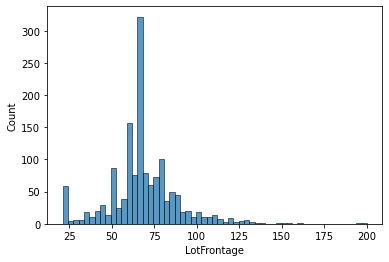

Skewness is 3.115216613500925
Kurtosis is 20.746548709480273


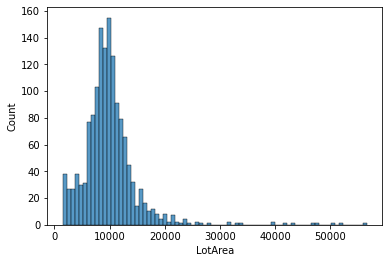

Skewness is 2.549568580084032
Kurtosis is 8.479206132512642


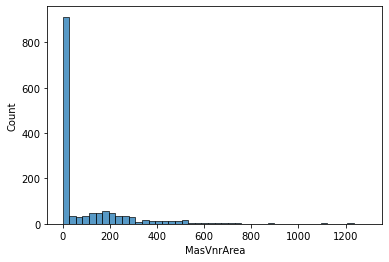

Skewness is 1.1663296764605604
Kurtosis is 2.673291224416369


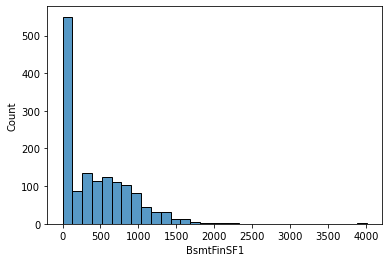

Skewness is 4.0429539042374705
Kurtosis is 17.68216539285966


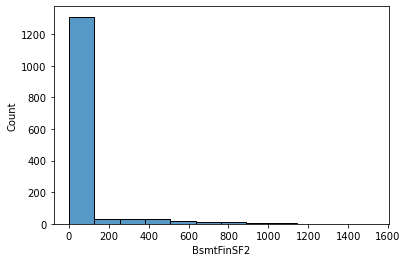

Skewness is 0.9199232287642486
Kurtosis is 0.33244656805494754


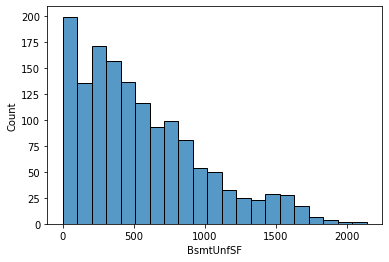

Skewness is 0.8050662652894462
Kurtosis is 5.173387914148094


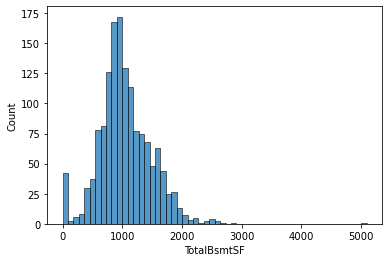

Skewness is 1.558194572983426
Kurtosis is 8.053863335994567


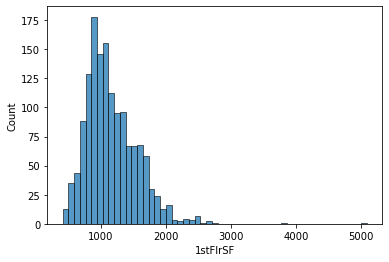

Skewness is 0.9128826344911904
Kurtosis is -0.27544098409544926


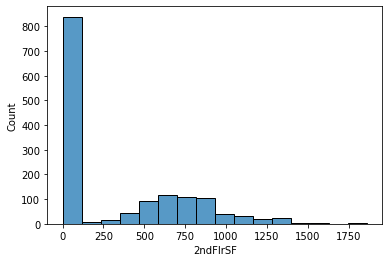

Skewness is 1.1304024140503506
Kurtosis is 2.9203451470914166


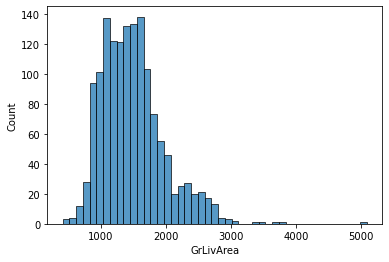

Skewness is 0.29629030596790457
Kurtosis is 0.9610046428994408


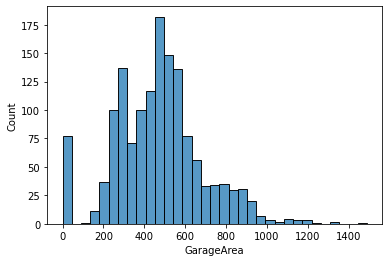

Skewness is 2.130759950574929
Kurtosis is 10.249278055421557


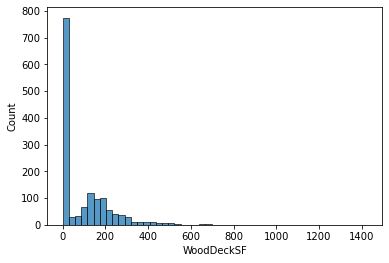

Skewness is 2.6877788503224047
Kurtosis is 13.010835704951141


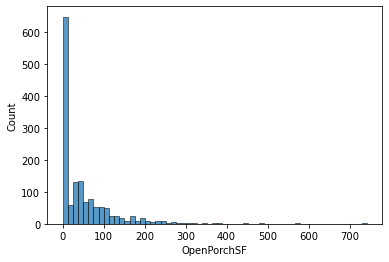

Skewness is 4.669172309715744
Kurtosis is 40.129017354477156


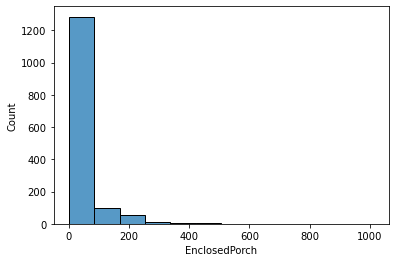

Skewness is 3.7882443811743776
Kurtosis is 17.239542060670402


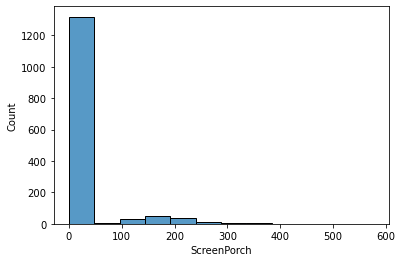

Skewness is 20.075188353860344
Kurtosis is 471.51738779462795


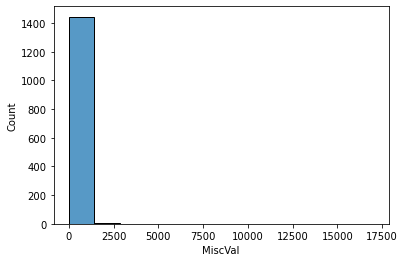

In [59]:
for feature in continuous_num_features:
    
    print('Skewness is {}'.format(df_num[feature].skew()))
    print('Kurtosis is {}'.format(df_num[feature].kurtosis()))
    sns.histplot(df_num[feature])
    plt.show()

Skewness is 0.7551919446513714
Kurtosis is 3.6400624275742333


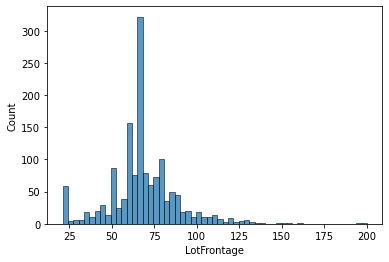

Skewness is 3.115216613500925
Kurtosis is 20.746548709480273


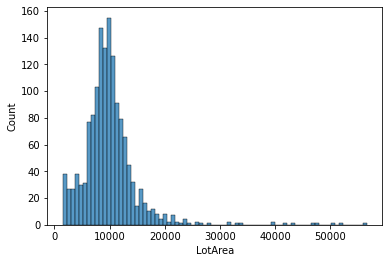

---------------->> MasVnrArea feature have 0 or -ve value

---------------->> BsmtFinSF1 feature have 0 or -ve value

---------------->> BsmtFinSF2 feature have 0 or -ve value

---------------->> BsmtUnfSF feature have 0 or -ve value

---------------->> TotalBsmtSF feature have 0 or -ve value

Skewness is 1.558194572983426
Kurtosis is 8.053863335994567


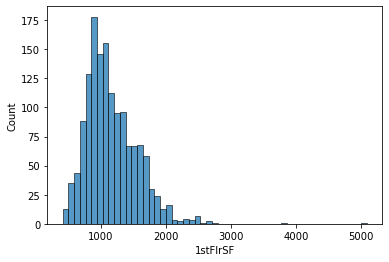

---------------->> 2ndFlrSF feature have 0 or -ve value

Skewness is 1.1304024140503506
Kurtosis is 2.9203451470914166


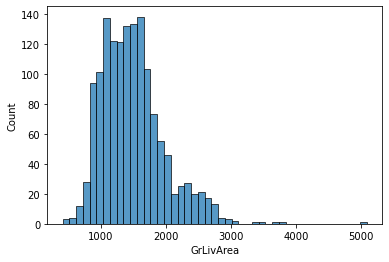

---------------->> GarageArea feature have 0 or -ve value

---------------->> WoodDeckSF feature have 0 or -ve value

---------------->> OpenPorchSF feature have 0 or -ve value

---------------->> EnclosedPorch feature have 0 or -ve value

---------------->> ScreenPorch feature have 0 or -ve value

---------------->> MiscVal feature have 0 or -ve value



In [60]:
for feature in continuous_num_features:
    if ((df_num[feature].unique() <= 0).any()):
        print('---------------->> {} feature have 0 or -ve value\n'.format(feature))
    else:
        print('Skewness is {}'.format(df_num[feature].skew()))
        print('Kurtosis is {}'.format(df_num[feature].kurtosis()))
        sns.histplot(df_num[feature])
        plt.show()

In [61]:
#In this code we have only selected those variable which does not have 0 or any negative number.
  
for feature in continuous_num_features:
    if ((df_num[feature].unique() <= 0).any()) or feature in ['LotFrontage']:
        pass
    else:
        df_num[feature] = np.log(df_num[feature])    

Skewness is -0.9160367674643524
Kurtosis is 2.593490749103557


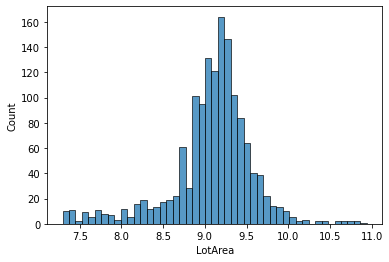

Skewness is 0.052526689855442475
Kurtosis is 0.1652461059484489


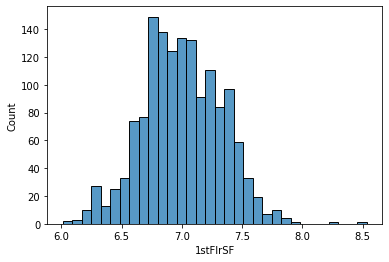

Skewness is 0.027623981154412496
Kurtosis is 0.11382106100760092


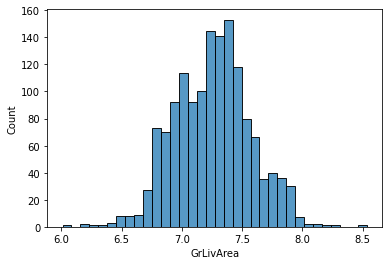

In [62]:
for feature in continuous_num_features:
    if ((df_num[feature].unique() <= 0).any()) or feature in ['LotFrontage']:
        pass
    else:
        print('Skewness is {}'.format(df_num[feature].skew()))
        print('Kurtosis is {}'.format(df_num[feature].kurtosis()))
        sns.histplot(df_num[feature])
        plt.show()

In [63]:
df_num[['LotArea', '1stFlrSF','GrLivArea']].head()   

,LotArea,1stFlrSF,GrLivArea
0,9.360655,6.797940,6.797940
1,9.565704,7.192182,7.192182
2,9.534595,6.833032,7.395722
3,9.208138,6.830874,7.380256
4,8.518193,7.154615,7.154615


In [64]:
df_num['LotFrontage'] = np.cbrt(df_num['LotFrontage'])
print('Skewness',(df_num['LotFrontage'].skew()))
print('Kurtosis',(df_num['LotFrontage'].kurtosis()))

Skewness -0.5318418954046734
Kurtosis 2.0974607545226114


Skewness of MasVnrArea is 1.0856898467241303
Kurtosis of MasVnrArea is 0.04923091483469211


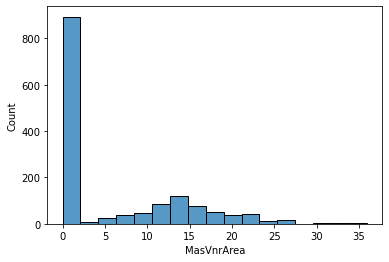

Skewness of BsmtFinSF1 is 0.007080182213592305
Kurtosis of BsmtFinSF1 is -1.2647237460276666


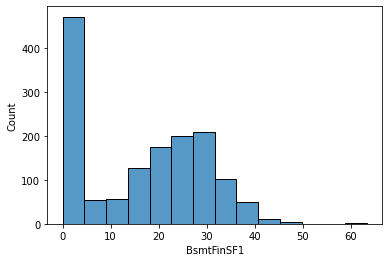

Skewness of BsmtFinSF2 is 2.930915502021087
Kurtosis of BsmtFinSF2 is 7.645849060532896


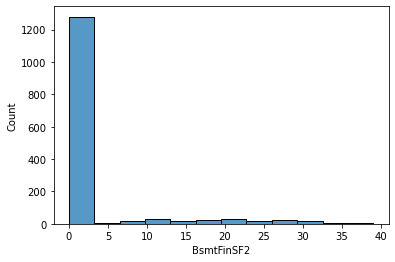

Skewness of BsmtUnfSF is -0.23032676410367814
Kurtosis of BsmtUnfSF is -0.30738553617840525


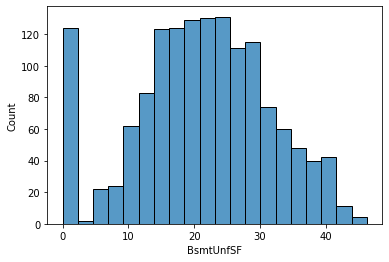

Skewness of TotalBsmtSF is -1.3476846213655507
Kurtosis of TotalBsmtSF is 4.924879963998897


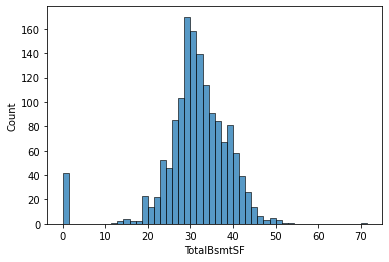

Skewness of 2ndFlrSF is 0.46951453566634027
Kurtosis of 2ndFlrSF is -1.5633118688385446


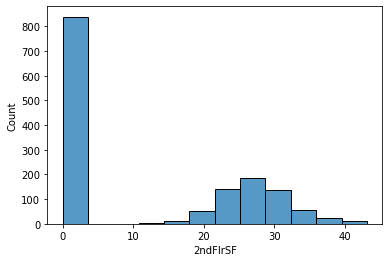

Skewness of WoodDeckSF is 0.529130856318651
Kurtosis of WoodDeckSF is -1.0225007157647634


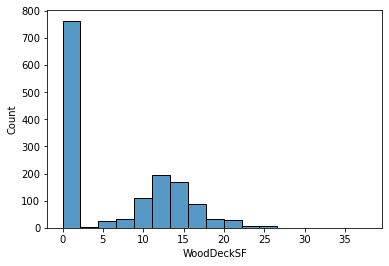

Skewness of OpenPorchSF is 0.6022615763723969
Kurtosis of OpenPorchSF is -0.39525998660983186


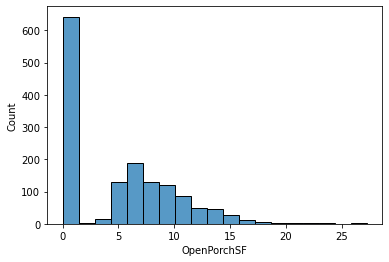

Skewness of EnclosedPorch is 2.2380226235978915
Kurtosis of EnclosedPorch is 4.219200694960939


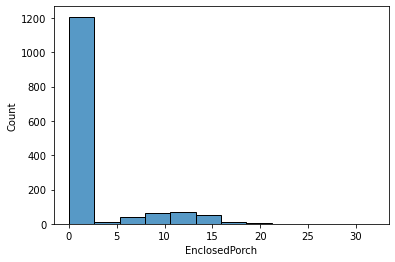

Skewness of ScreenPorch is 2.941660743787694
Kurtosis of ScreenPorch is 7.2232672365358415


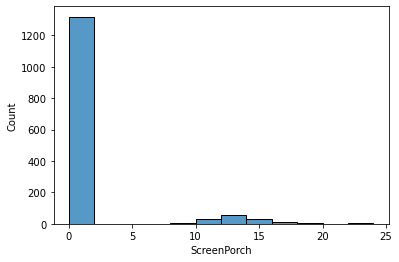

In [65]:
#In this code we have only selected those variable which have 0.
  
for feature in continuous_num_features:
    if 0 in df_num[feature].unique() and feature not in ['GarageArea', 'MiscVal']:
        df_num[feature] = np.sqrt(df_num[feature])
        print('Skewness of {} is {}'.format(feature, df_num[feature].skew()))
        print('Kurtosis of {} is {}'.format(feature, df_num[feature].kurtosis()))
        sns.histplot(df_num[feature])
        plt.show()
    else:
        pass   

# Need to ckeck MiscVal

# Categorical data

In [66]:
df_CF = df_num.copy()

In [67]:
categorical_feature = [feature for feature in df_CF.columns if df_CF[feature].dtypes == 'O']
print('Total categorical features are {}'.format(len(categorical_feature)))

Total categorical features are 39


In [68]:
df_CF[categorical_feature]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,No Fireplace,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,No Fireplace,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,No Fireplace,No Garage,No Garage,No Garage,No Garage,Y,WD,Normal
1455,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,No Fireplace,CarPort,Unf,TA,TA,Y,WD,Abnorml
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Detchd,Unf,TA,TA,Y,WD,Abnorml
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,No Fireplace,No Garage,No Garage,No Garage,No Garage,Y,WD,Normal


In [69]:
for feature in categorical_feature:
    print('Total categories in {} are : {}'.format(feature,df_CF[feature].nunique()))

Total categories in MSZoning are : 5
Total categories in Street are : 2
Total categories in LotShape are : 4
Total categories in LandContour are : 4
Total categories in Utilities are : 1
Total categories in LotConfig are : 5
Total categories in LandSlope are : 3
Total categories in Neighborhood are : 25
Total categories in Condition1 are : 9
Total categories in Condition2 are : 5
Total categories in BldgType are : 5
Total categories in HouseStyle are : 7
Total categories in RoofStyle are : 6
Total categories in RoofMatl are : 4
Total categories in Exterior1st are : 13
Total categories in Exterior2nd are : 15
Total categories in MasVnrType are : 4
Total categories in ExterQual are : 4
Total categories in ExterCond are : 5
Total categories in Foundation are : 6
Total categories in BsmtQual are : 5
Total categories in BsmtCond are : 5
Total categories in BsmtExposure are : 5
Total categories in BsmtFinType1 are : 7
Total categories in BsmtFinType2 are : 7
Total categories in Heating are :

In [70]:
for feature in categorical_feature:
    temp = df_CF[feature].value_counts()/df_CF[feature].shape[0]*100
    temp_df = temp[temp<1].index
    df_CF[feature] = np.where(df_CF[feature].isin(temp_df), 'Rare_var', df_CF[feature])

In [76]:
df_CF[categorical_feature].shape

(1459, 39)

In [77]:
df_CF.shape

(1459, 76)

In [78]:
df_CF.to_csv('./Cleaned data/{}'.format('Test_data_encoding.csv'), index= False)

In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
le = LabelEncoder()

In [75]:
for feature in categorical_feature:
    df_CF[feature] = le.fit_transform(df_CF[feature])

In [76]:
df_CF[categorical_feature]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,4,0,3,3,0,3,0,9,1,0,0,1,0,0,8,9,1,3,3,1,4,4,3,5,3,0,4,1,3,3,4,3,1,3,3,3,2,4,2
1,2,0,0,3,0,0,0,9,2,0,0,1,1,0,9,10,0,3,3,1,4,4,3,0,6,0,4,1,3,2,4,3,1,3,3,3,2,4,2
2,2,0,0,3,0,3,0,5,2,0,0,2,0,0,8,9,1,3,3,2,2,4,3,2,6,0,2,1,3,3,4,5,1,0,3,3,2,4,2
3,2,0,0,3,0,3,0,5,2,0,0,2,0,0,8,9,0,3,3,2,4,4,3,2,6,0,0,1,3,2,4,2,1,0,3,3,2,4,2
4,2,0,0,1,0,3,0,19,2,0,4,1,0,0,3,4,1,2,3,2,2,4,3,0,6,0,0,1,3,2,4,3,1,2,3,3,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3,0,3,3,0,3,0,7,2,0,3,2,0,0,2,3,1,3,3,1,4,4,3,6,6,0,2,1,3,3,4,3,5,1,1,1,2,4,2
1455,3,0,3,3,0,3,0,7,2,0,4,2,0,0,2,3,1,3,3,1,4,4,3,5,6,0,4,1,3,3,4,3,6,3,3,3,2,4,0
1456,2,0,3,3,0,3,0,8,2,0,0,1,0,0,8,9,1,3,3,1,4,4,3,0,6,0,0,1,3,3,4,5,4,3,3,3,2,4,0
1457,2,0,3,3,0,3,0,8,2,0,0,4,0,0,3,11,1,3,3,2,2,4,0,2,6,0,4,1,3,3,4,3,5,1,1,1,2,4,2


In [77]:
null_features1 = [features for features in df_CF.columns if df_CF[features].isnull().sum() > 0]
null_features1

[]

In [78]:
final_test_data = df_CF.copy()

In [79]:
final_test_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int32  
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   float64
 5   Street         1459 non-null   int32  
 6   LotShape       1459 non-null   int32  
 7   LandContour    1459 non-null   int32  
 8   Utilities      1459 non-null   int32  
 9   LotConfig      1459 non-null   int32  
 10  LandSlope      1459 non-null   int32  
 11  Neighborhood   1459 non-null   int32  
 12  Condition1     1459 non-null   int32  
 13  Condition2     1459 non-null   int32  
 14  BldgType       1459 non-null   int32  
 15  HouseStyle     1459 non-null   int32  
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [81]:
final_test_data.to_csv('./Cleaned data/{}'.format('Test_data.csv'), index= False)

# Feature Scaling

As I have choosed Random Forest, so i do not need to scale down my features

scale_feature = [feature for feature in final_test_data.columns if feature not in 'Id']

len(scale_feature)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(final_test_data[scale_feature])

scaler.transform(final_test_data[scale_feature])

scaled_data = pd.concat([final_test_data['Id'].reset_index(drop=True),
                        pd.DataFrame(scaler.transform(final_test_data[scale_feature]), columns = scale_feature)], axis = 1)

scaled_data.to_csv('./Cleaned data House Price data/{}'.format('Test_data.csv'), index= False)

scaled_data.shape